In [1]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
from ResoFit._pulse_shape import NeutronPulse
import numpy as np
import matplotlib.pyplot as plt
import pprint

In [2]:
# path1 = '/Users/Shawn/Dropbox (ORNL)/Postdoc_research/neutron_beam_shape/SNS/neutron_pulse/source_section_1.dat'
# path2 = '/Users/Shawn/Dropbox (ORNL)/Postdoc_research/neutron_beam_shape/SNS/neutron_pulse/source_section_2.dat'
path1 = '/Users/y9z/Dropbox (ORNL)/Postdoc_research/neutron_beam_shape/SNS/neutron_pulse/source_section_1.dat'
path2 = '/Users/y9z/Dropbox (ORNL)/Postdoc_research/neutron_beam_shape/SNS/neutron_pulse/source_section_2.dat'

In [18]:
neutron_pulse = NeutronPulse(path1)
neutron_pulse.load_shape_each(path2)

In [19]:
df = neutron_pulse.shape_df
for each in neutron_pulse.shape_df.set_index('t_us').columns:
    if each <1 or each >100:
        df.drop(columns=each, inplace=True)
df

,t_us,1.0,1.122,1.2589,1.4125,1.5849,1.7783,1.9953,2.2387,2.5119,...,35.481,39.811,44.668,50.119,56.234,63.096,70.795,79.433,89.125,100.0
0,5.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.033000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,1.101300e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,1.174000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,1.251500e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,1.334200e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,1.422300e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,1.516300e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,1.616400e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,1.723200e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [42]:
_shape_df = df

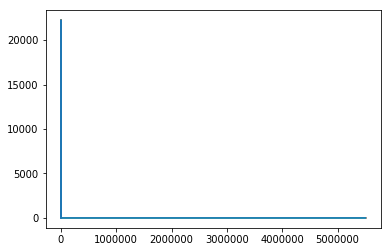

In [48]:
fig, ax1 = plt.subplots()
a = ax1.plot(_shape_df.set_index('t_us'))
# ax1.set_xlim(-1,100)
# plt.show()

In [24]:
df.set_index('t_us').plot(kind=':')


ValueError: ':' is not a valid plot kind

In [4]:
neutron_pulse.fit_shape(e_min=1, e_max=500,
                        drop=False, check_each=True,
                        save_fig=False)

'/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Neutron_fitted_params_1eV_500eV_ikeda_carpenter.csv' exists...
File loaded.


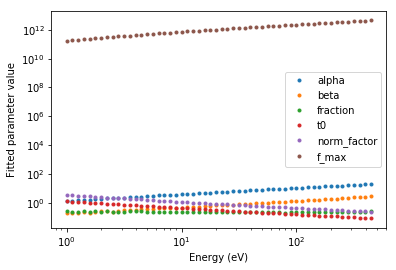

In [5]:
neutron_pulse.plot_params_vs_e()

In [20]:
first_e = list(neutron_pulse.shape_dict.keys())[0]

In [24]:
neutron_pulse.shape_dict[first_e]['data_raw']

,t_us,b,bs,f,s,f_norm,s_norm,E_eV
0,5.000000e-02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00001
1,1.033000e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00001
2,1.101300e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00001
3,1.174000e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00001
4,1.251500e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00001
5,1.334200e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00001
6,1.422300e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00001
7,1.516300e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00001
8,1.616400e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00001
9,1.723200e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00001


In [9]:
neutron_pulse.shape_df

AttributeError: 'NeutronPulse' object has no attribute 'shape_df'